In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML
from stargazer.stargazer import Stargazer
import statsmodels.nonparametric.kernel_regression as loess
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("/Gabors-Data-Analysis")[0]

# location folders
data_in = dirname + "/Gabors-Data-Analysis/da_data_repo/da_data_repo/cps-earnings/clean/"
data_out = dirname + "/Assignment1"
output = dirname + "/Assignment1"
func = dirname + "/Gabors-Data-Analysis/da_case_studies/ch00-tech-prep"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

In [4]:
df_all = pd.read_csv( data_in + "morg-2014-emp.csv" )

### Filtering the dataset for management occupations (codes: 0010-0430)

In [5]:
# Filter
df_all.loc[
    ((df_all["occ2012"] >= 10) & (df_all["occ2012"] <= 430)), "sample"
] = 1

df_all.loc[df_all["sample"].isna(), "sample"] = 0 # were NAs input zeros
# sample == 0

df_all

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,sample
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work,0.0
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent,0.0
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work,0.0
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work,0.0
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149311,317051,896679860459501,December,WY,346.2296,692.30,40,39,1,NaN,...,0,"Native, Born In US",8,Office supplies and stationery stores (45321),4760,"Private, For Profit",No,No,Employed-At Work,0.0
149312,317052,907086820569600,December,WY,294.9800,1984.61,40,44,1,NaN,...,3,"Native, Born In US",8,Administration of human resource programs (923),430,Government - State,No,No,Employed-At Work,1.0
149313,317053,907086820569600,December,WY,324.1761,2884.61,55,43,1,NaN,...,3,"Native, Born In US",8,Nursing care facilities (6231),10,"Private, For Profit",No,No,Employed-At Work,1.0
149314,317055,950868097156649,December,WY,321.6982,1153.84,40,42,1,NaN,...,0,"Native, Born In US",8,Hospitals (622),5820,"Private, Nonprofit",No,No,Employed-At Work,0.0


In [6]:
df_all = df_all.loc[
    (df_all["sample"] == 1), :
].reset_index(drop=True) # keep only sample == 1
df_all

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,sample
0,32,731019430119001,January,AL,3862.8767,1019.23,40,41,2,NaN,...,0,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",120,"Private, For Profit",No,No,Employed-At Work,1.0
1,46,960051978039750,January,AL,3062.3621,500.00,40,44,2,NaN,...,0,"Native, Born In US",63,Administration of human resource programs (923),430,Government - State,No,No,Employed-At Work,1.0
2,49,961709030629000,January,AL,4593.3560,2884.61,50,43,1,NaN,...,1,"Native, Born In US",63,Aerospace products and parts manufacturing (33...,300,"Private, For Profit",No,No,Employed-At Work,1.0
3,80,97973400095118,January,AL,3206.3662,2000.00,60,43,1,NaN,...,0,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",10,"Private, For Profit",No,No,Employed-At Work,1.0
4,129,510365013001006,January,AL,4167.9035,2000.00,50,44,1,NaN,...,8,"Native, Born In US",63,Air transportation (481),300,"Private, For Profit",Yes,NaN,Employed-At Work,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14880,316982,76086431501821,December,WY,302.1607,1500.00,40,41,7,NaN,...,0,"Native, Born In US",8,National security and international affairs (928),430,Government - Federal,No,No,Employed-At Work,1.0
14881,317011,503270910015650,December,WY,331.3770,1440.00,40,43,1,NaN,...,0,"Native, Born In US",8,Employment services (5613),150,Government - State,No,No,Employed-At Work,1.0
14882,317027,597906306042629,December,WY,333.6761,1340.00,58,39,1,NaN,...,8,"Native, Born In US",8,"Machinery manufacturing, n.e.c. (3332, 3334, 3...",140,"Private, For Profit",No,No,Employed-At Work,1.0
14883,317052,907086820569600,December,WY,294.9800,1984.61,40,44,1,NaN,...,3,"Native, Born In US",8,Administration of human resource programs (923),430,Government - State,No,No,Employed-At Work,1.0


In [7]:
df_all["sample"].value_counts()

sample
1.0    14885
Name: count, dtype: int64

Create variables

In [8]:
df_all["female"] = (df_all["sex"] == 2)
df_all["w"] = df_all["earnwke"] / df_all["uhours"]
df_all["lnw"] = np.log(df_all["w"])

In [9]:
i = 1 # we consider only management occupations here
data = df_all.loc[df_all["sample"] == i, :].reset_index(drop=True)
data.to_csv(data_out + "management_occupations.csv", index=False)

### Distribution of earnings & wages for managemant occupations

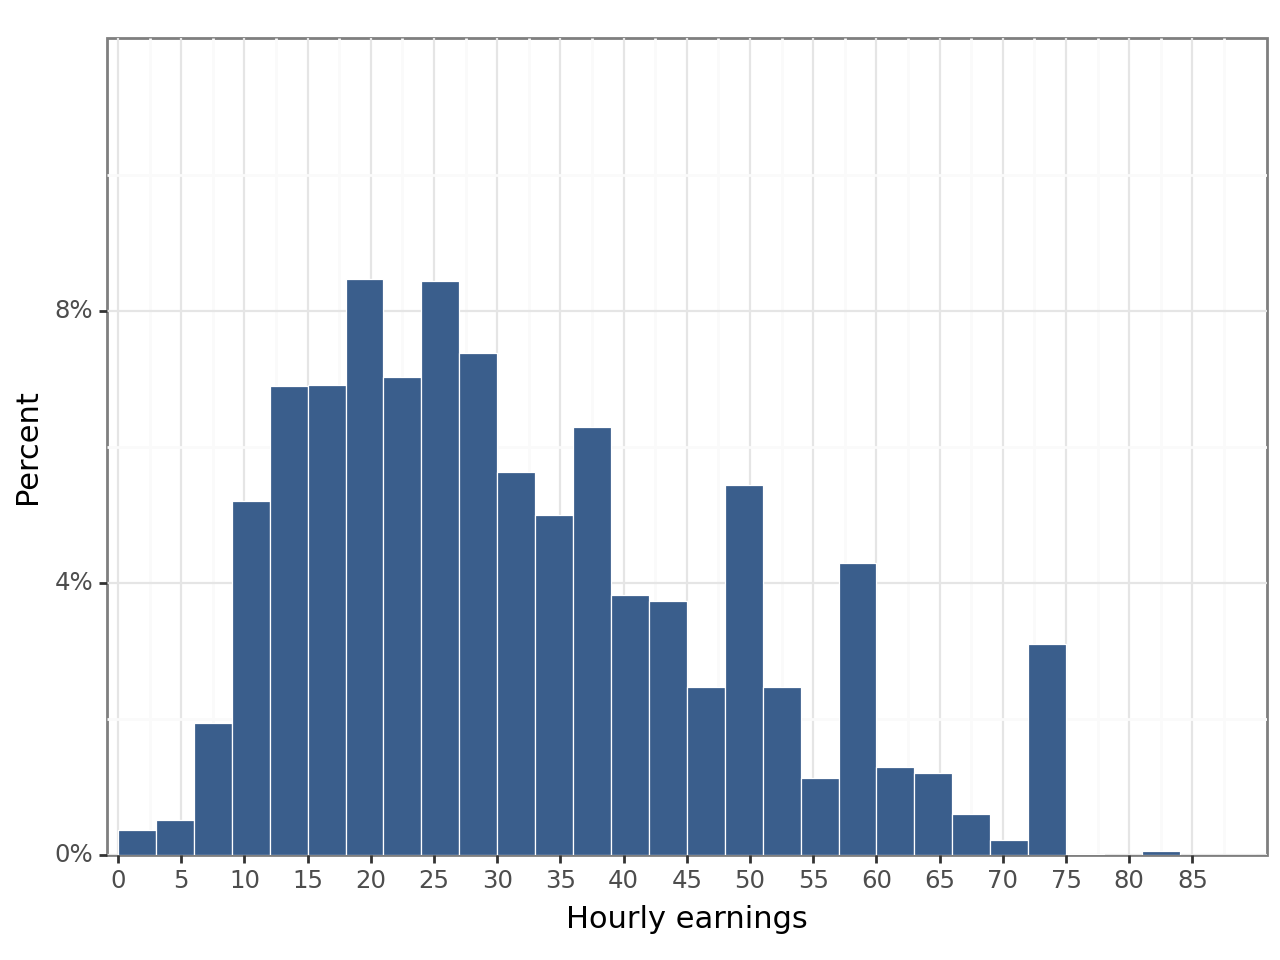

<Figure Size: (640 x 480)>

In [10]:
(
    ggplot(data, aes(x="w", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=3,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Hourly earnings", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 90), breaks=seq(0, 90, 5))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        breaks=seq(0, 0.12, 0.04),
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)

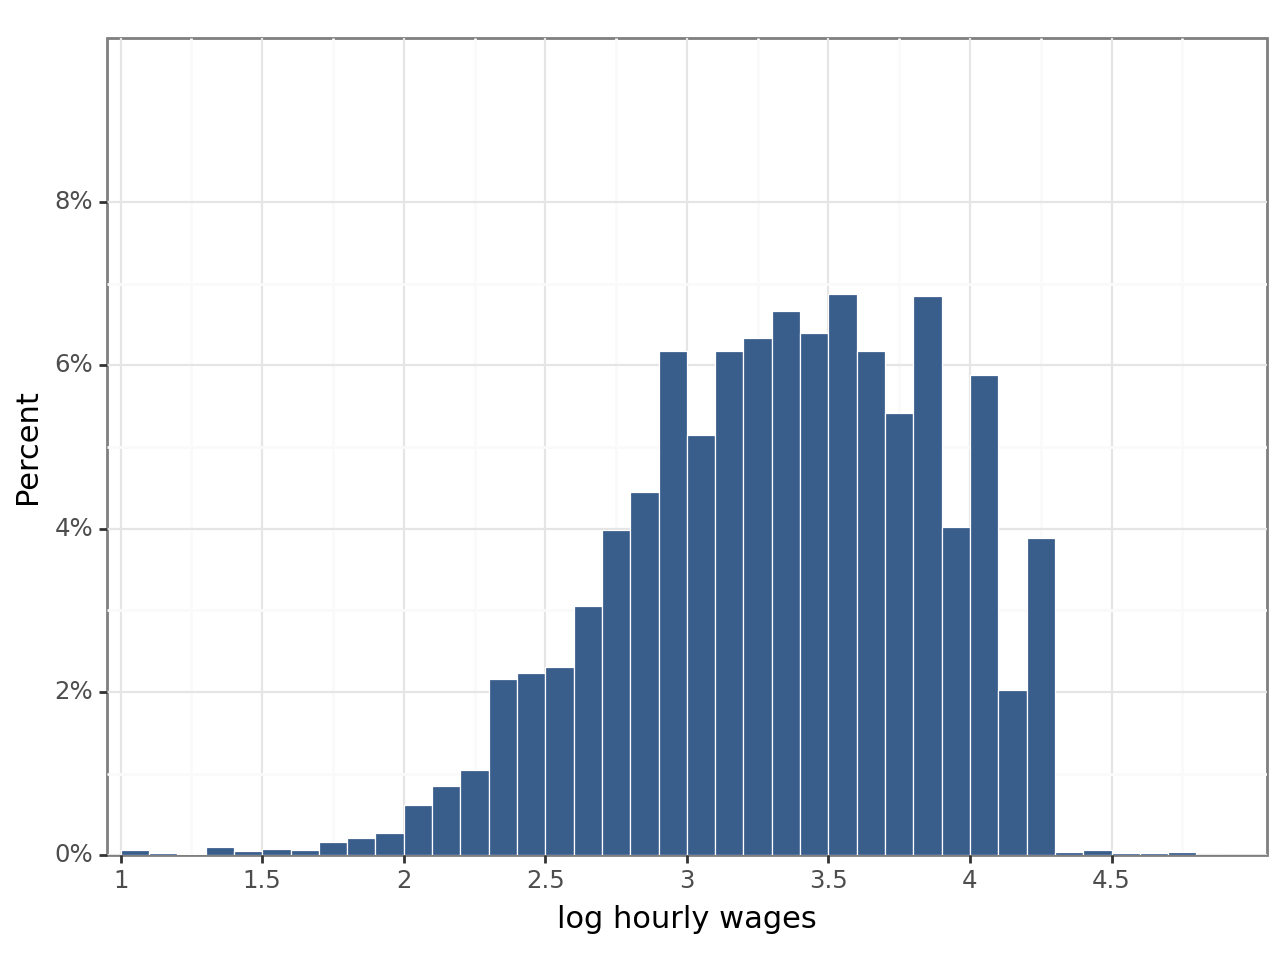

<Figure Size: (640 x 480)>

In [11]:
(
    ggplot(data, aes(x="lnw", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=0.1,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="log hourly wages", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 5, 0.5))
    + scale_y_continuous(
        expand=(0.0, 0.0),
        limits=(0, 0.1),
        breaks=seq(0, 0.1, 0.02),
        labels=percent_format(), #mizani
    )
    + theme_bw()
)

In [12]:
data.loc[:, ["earnwke", "uhours", "w", "lnw"]].describe()

,earnwke,uhours,w,lnw
count,14885.000000,14885.000000,14885.000000,14885.000000
mean,1419.830840,44.013100,32.235515,3.317019
std,766.694296,8.946189,17.736623,0.639346
min,0.010000,2.000000,0.000125,-8.987197
25%,807.000000,40.000000,19.230600,2.956503
50%,1250.000000,40.000000,28.846000,3.361971
75%,1923.070000,50.000000,43.162222,3.764966
max,2884.610000,99.000000,480.768333,6.175386


In [13]:
data["female"] = data["female"].astype(int)  #from boolean to 0,1
data["female"].value_counts()

female
0    8313
1    6572
Name: count, dtype: int64

In [14]:
data.groupby(["occ2012", "female"]).size()

occ2012  female
10       0          918
         1          356
20       0          715
         1          332
40       0           26
         1           32
50       0          539
         1          494
60       0           28
         1           61
100      0           92
         1           77
110      0          510
         1          219
120      0          608
         1          793
135      0            5
         1           16
136      0           77
         1          233
137      0           23
         1           26
140      0          276
         1           64
150      0          111
         1           97
160      0          242
         1           58
205      0          116
         1           30
220      0          479
         1           49
230      0          346
         1          620
300      0          120
         1            9
310      0          446
         1          453
330      0           11
         1           12
340      0           67


In [15]:
reg1 = smf.ols(formula="lnw~female", data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     318.8
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.40e-70
Time:                        18:01:51   Log-Likelihood:                -14304.
No. Observations:               14885   AIC:                         2.861e+04
Df Residuals:                   14883   BIC:                         2.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3993      0.007    489.922      0.000       3.386       3.413
female        -0.1865      0.010    -17.856      0.000      -0.207      -0.166
==============================================================================
Omnibus:                    12482.300   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1372066.861
Skew:                          -3.447   Prob(JB):                         0.00
Kurtosis:                      49.527   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
reg2 = smf.ols(formula="lnw~female", data=data).fit(cov_type="HC1") 
#heteroskedastic-consistent standard errors
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     314.9
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           9.79e-70
Time:                        18:01:51   Log-Likelihood:                -14304.
No. Observations:               14885   AIC:                         2.861e+04
Df Residuals:                   14883   BIC:                         2.863e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3993      0.007    501.964      0.000       3.386       3.413
female        -0.1865      0.011    -17.745      0.000      -0.207      -0.166
==============================================================================
Omnibus:                    12482.300   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1372066.861
Skew:                          -3.447   Prob(JB):                         0.00
Kurtosis:                      49.527   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

The coefficient for female here is statistically significant.

In [17]:
stargazer = Stargazer([reg1, reg2])
stargazer.covariate_order(["female", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

Robust SE slope: 0.06, CI $[-0.234,0.008]$ (wide)

-> in 2014 in the USA we can be 95\% confident that the average difference between hourly earnings of female market analysts versus male was -23\% to 1\%

-> the CI *includes* zero -> we cannot rule out with 95\% confidence that their average earnings (female and male) are the same 

-> $|t|=1.8<1.96$ cannot reject $H_0$

-> it can be seen also by p-value$> 0.05$

-> the coefficient cannot be considered statistically significant at 5\% (significant at 10\%)

Now filtering my dataframe/dataset for this: Show how the gender gap varies with the level of education. Consider several options to model the relationship

In [18]:
df_edu = df_all # Creating a separate df for doing analysis of gender gap & educational level
df_edu.query( 'earnwke > 0' )

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ind02,occ2012,class,unionmme,unioncov,lfsr94,sample,female,w,lnw
0,32,731019430119001,January,AL,3862.8767,1019.23,40,41,2,NaN,...,"Banking and related activities (521, 52211,52219)",120,"Private, For Profit",No,No,Employed-At Work,1.0,False,25.480750,3.237923
1,46,960051978039750,January,AL,3062.3621,500.00,40,44,2,NaN,...,Administration of human resource programs (923),430,Government - State,No,No,Employed-At Work,1.0,True,12.500000,2.525729
2,49,961709030629000,January,AL,4593.3560,2884.61,50,43,1,NaN,...,Aerospace products and parts manufacturing (33...,300,"Private, For Profit",No,No,Employed-At Work,1.0,False,57.692200,4.055122
3,80,97973400095118,January,AL,3206.3662,2000.00,60,43,1,NaN,...,"Banking and related activities (521, 52211,52219)",10,"Private, For Profit",No,No,Employed-At Work,1.0,False,33.333333,3.506558
4,129,510365013001006,January,AL,4167.9035,2000.00,50,44,1,NaN,...,Air transportation (481),300,"Private, For Profit",Yes,NaN,Employed-At Work,1.0,False,40.000000,3.688879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14880,316982,76086431501821,December,WY,302.1607,1500.00,40,41,7,NaN,...,National security and international affairs (928),430,Government - Federal,No,No,Employed-At Work,1.0,True,37.500000,3.624341
14881,317011,503270910015650,December,WY,331.3770,1440.00,40,43,1,NaN,...,Employment services (5613),150,Government - State,No,No,Employed-At Work,1.0,False,36.000000,3.583519
14882,317027,597906306042629,December,WY,333.6761,1340.00,58,39,1,NaN,...,"Machinery manufacturing, n.e.c. (3332, 3334, 3...",140,"Private, For Profit",No,No,Employed-At Work,1.0,False,23.103448,3.139982
14883,317052,907086820569600,December,WY,294.9800,1984.61,40,44,1,NaN,...,Administration of human resource programs (923),430,Government - State,No,No,Employed-At Work,1.0,True,49.615250,3.904298


Create variables for education levels:
Primary Education (codes 31-35)
Secondary Education (codes 36-39)
Post-secondary Education without a degree (codes 40-41)
Undergraduate Degree (codes 42-43)
Graduate Degrees (codes 44-46)

In [19]:
education_levels = {
    'Primary': [31, 32, 33, 34, 35],
    'Secondary': [36, 37, 38, 39],
    'Post_secondary': [40, 41],
    'Undergraduate': [42, 43],
    'Graduate': [44, 45, 46]
}

for level, codes in education_levels.items():
    df_edu[level] = df_edu['grade92'].isin(codes).astype(int)

In [20]:
columns_list = df_edu.columns.tolist()
print(columns_list)


['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke', 'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital', 'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012', 'class', 'unionmme', 'unioncov', 'lfsr94', 'sample', 'female', 'w', 'lnw', 'Primary', 'Secondary', 'Post_secondary', 'Undergraduate', 'Graduate']


In [21]:
# dummy variables already created for the education levels and primary is the reference group
reg3 = smf.ols(formula="lnw ~ C(female) + C(Secondary) + C(Post_secondary) + C(Undergraduate) + C(Graduate)", data=df_edu).fit(cov_type="HC1")
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     526.9
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:01:51   Log-Likelihood:                -13339.
No. Observations:               14885   AIC:                         2.669e+04
Df Residuals:                   14879   BIC:                         2.674e+04
Df Model:                           5                                         
Covariance Type:                  HC1                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.6638      0.069     38.398      0.000       2.528       2.800
C(female)[T.True]         -0.1903      0.010    -19.319      0.000      -0.210      -0.171
C(Secondary)[T.1]          0.4190      0.071      5.940      0.000       0.281       0.557
C(Post_secondary)[T.1]     0.5055      0.070      7.185      0.000       0.368       0.643
C(Undergraduate)[T.1]      0.8172      0.070     11.715      0.000       0.680       0.954
C(Graduate)[T.1]           1.0156      0.070     14.522      0.000       0.879       1.153
==============================================================================
Omnibus:                    13993.999   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2279850.610
Skew:                          -4.054   Prob(JB):                         0.00
Kurtosis:                      63.085   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

The results indicate increase in weekly earnings as education levels go higher.

In [22]:
formula = "lnw ~ female + Secondary + Post_secondary + Undergraduate + Graduate + female:Secondary + female:Post_secondary + \
           female:Undergraduate + female:Graduate"
reg_interaction = smf.ols(formula=formula, data=df_edu).fit(cov_type="HC1")
reg_interaction.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     295.2
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:01:51   Log-Likelihood:                -13337.
No. Observations:               14885   AIC:                         2.669e+04
Df Residuals:                   14875   BIC:                         2.677e+04
Df Model:                           9                                         
Covariance Type:                  HC1                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.7176      0.079     34.521      0.000       2.563       2.872
female[T.True]                   -0.3618      0.156     -2.314      0.021      -0.668      -0.055
Secondary                         0.3707      0.081      4.599      0.000       0.213       0.529
female[T.True]:Secondary          0.1586      0.158      1.001      0.317      -0.152       0.469
Post_secondary                    0.4507      0.080      5.610      0.000       0.293       0.608
female[T.True]:Post_secondary     0.1738      0.158      1.099      0.272      -0.136       0.484
Undergraduate                     0.7689      0.079      9.693      0.000       0.613       0.924
female[T.True]:Undergraduate      0.1593      0.157      1.014      0.310      -0.149       0.467
Graduate                          0.9471      0.079     11.914      0.000       0.791       1.103
female[T.True]:Graduate           0.2055      0.157      1.305      0.192      -0.103       0.514
==============================================================================
Omnibus:                    14002.539   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2286373.667
Skew:                          -4.058   Prob(JB):                         0.00
Kurtosis:                      63.171   Cond. No.                         97.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

There is a upward increasing trend in the weekly earnings as the education levels go higher considering for females in the above table.

In [23]:
print(df_edu.head())


   Unnamed: 0             hhid intmonth stfips     weight  earnwke  uhours  \
0          32  731019430119001  January     AL  3862.8767  1019.23      40   
1          46  960051978039750  January     AL  3062.3621   500.00      40   
2          49  961709030629000  January     AL  4593.3560  2884.61      50   
3          80   97973400095118  January     AL  3206.3662  2000.00      60   
4         129  510365013001006  January     AL  4167.9035  2000.00      50   

   grade92  race  ethnic  ...            lfsr94  sample  female          w  \
0       41     2     NaN  ...  Employed-At Work     1.0   False  25.480750   
1       44     2     NaN  ...  Employed-At Work     1.0    True  12.500000   
2       43     1     NaN  ...  Employed-At Work     1.0   False  57.692200   
3       43     1     NaN  ...  Employed-At Work     1.0   False  33.333333   
4       44     1     NaN  ...  Employed-At Work     1.0   False  40.000000   

        lnw Primary Secondary Post_secondary  Undergraduate Gr

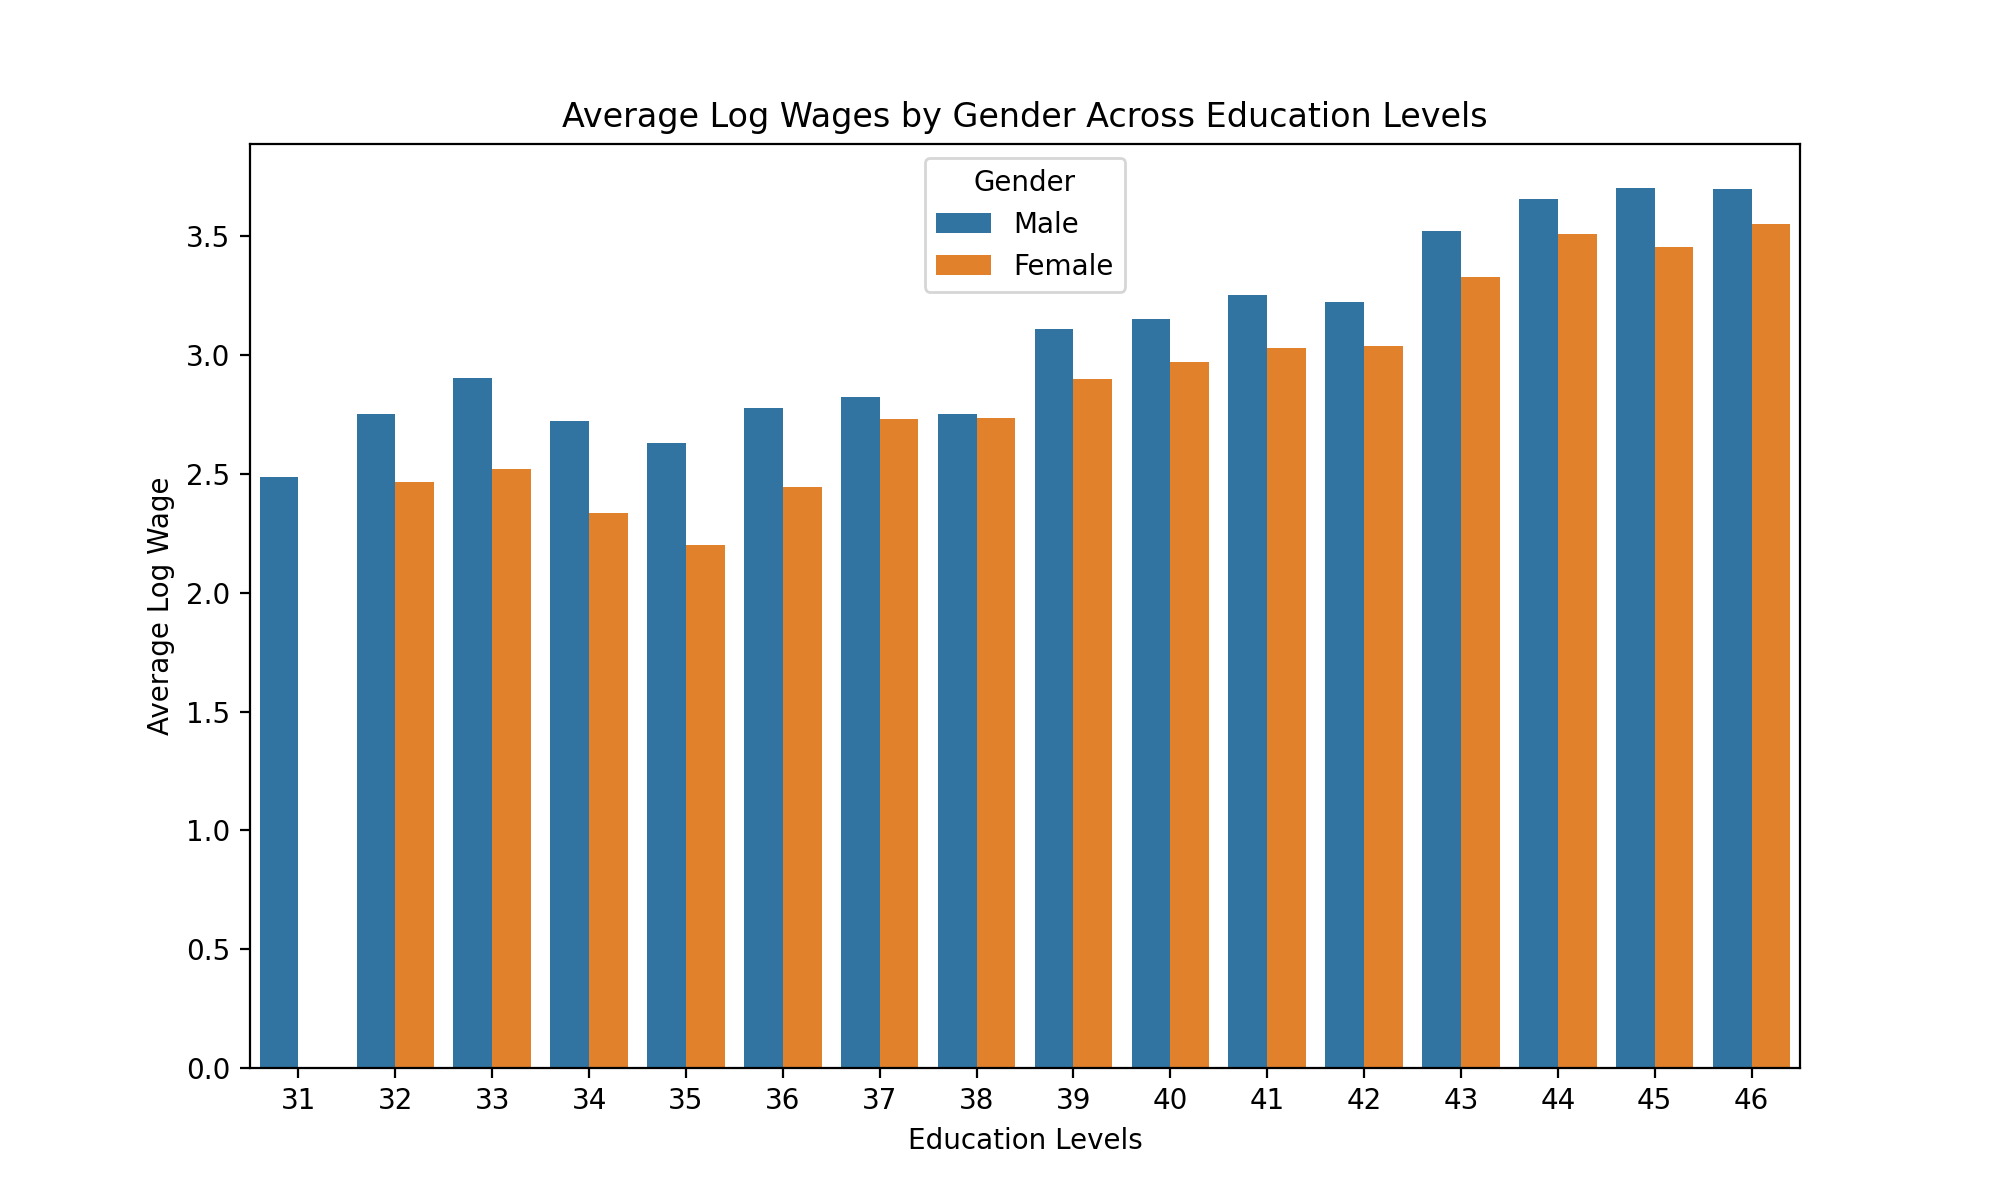

In [24]:
# bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='grade92', y='lnw', hue='female', data=df_edu, ci=None)

# title and labels
plt.title('Average Log Wages by Gender Across Education Levels')
plt.xlabel('Education Levels')
plt.ylabel('Average Log Wage')
plt.legend(title='Gender', labels=['Male', 'Female'])

# Show the plot
plt.show()


In [25]:
# Creating dummy variables for each marital status category except 'Never Married' (code 7)
marital_statuses = ['Married_civilian', 'Married_AF', 'Married_absent', 'Widowed_divorced_88', 'Divorced', 'Separated']

for status in marital_statuses:
    df_edu[status] = (df_edu['marital'] == marital_statuses.index(status) + 1).astype(int)


In [27]:
# Defining the formula with interaction terms between female and marital status categories
formula = "lnw ~ female + Secondary + Post_secondary + Undergraduate + Graduate + \
           female:Secondary + female:Post_secondary + female:Undergraduate + female:Graduate + \
           Married_civilian + Married_AF + Married_absent + Widowed_divorced_88 + Divorced + Separated + \
           female:Married_civilian + female:Married_AF + female:Married_absent + \
           female:Widowed_divorced_88 + female:Divorced + female:Separated"

# Fitting the regression model
reg_interaction_marital = smf.ols(formula=formula, data=df_edu).fit(cov_type="HC1")
reg_interaction_marital.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     155.6
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:02:10   Log-Likelihood:                -13095.
No. Observations:               14885   AIC:                         2.623e+04
Df Residuals:                   14863   BIC:                         2.640e+04
Df Model:                          21                                         
Covariance Type:                  HC1                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              2.4689      0.083     29.850      0.000       2.307       2.631
female[T.True]                        -0.2771      0.162     -1.710      0.087      -0.595       0.041
Secondary                              0.3716      0.083      4.479      0.000       0.209       0.534
female[T.True]:Secondary               0.1513      0.163      0.928      0.353      -0.168       0.471
Post_secondary                         0.4517      0.083      5.461      0.000       0.290       0.614
female[T.True]:Post_secondary          0.1708      0.163      1.050      0.294      -0.148       0.490
Undergraduate                          0.7677      0.082      9.390      0.000       0.607       0.928
female[T.True]:Undergraduate           0.1636      0.162      1.013      0.311      -0.153       0.480
Graduate                               0.9235      0.082     11.269      0.000       0.763       1.084
female[T.True]:Graduate                0.2218      0.162      1.369      0.171      -0.096       0.539
Married_civilian                       0.3148      0.016     19.231      0.000       0.283       0.347
female[T.True]:Married_civilian       -0.1032      0.025     -4.172      0.000      -0.152      -0.055
Married_AF                            -0.3228      0.169     -1.909      0.056      -0.654       0.009
female[T.True]:Married_AF              0.4442      0.196      2.266      0.023       0.060       0.829
Married_absent                         0.3166      0.054      5.827      0.000       0.210       0.423
female[T.True]:Married_absent         -0.2075      0.113     -1.838      0.066      -0.429       0.014
Widowed_divorced_88                    0.2915      0.062      4.688      0.000       0.170       0.413
female[T.True]:Widowed_divorced_88    -0.0656      0.078     -0.839      0.401      -0.219       0.088
Divorced                               0.2614      0.026     10.144      0.000       0.211       0.312
female[T.True]:Divorced               -0.0354      0.035     -1.016      0.309      -0.104       0.033
Separated                              0.2020      0.062      3.238      0.001       0.080       0.324
female[T.True]:Separated              -0.0192      0.080     -0.239      0.811      -0.177       0.138
==============================================================================
Omnibus:                    14491.247   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2685320.684
Skew:                          -4.268   Prob(JB):                         0.00
Kurtosis:                      68.244   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors are he

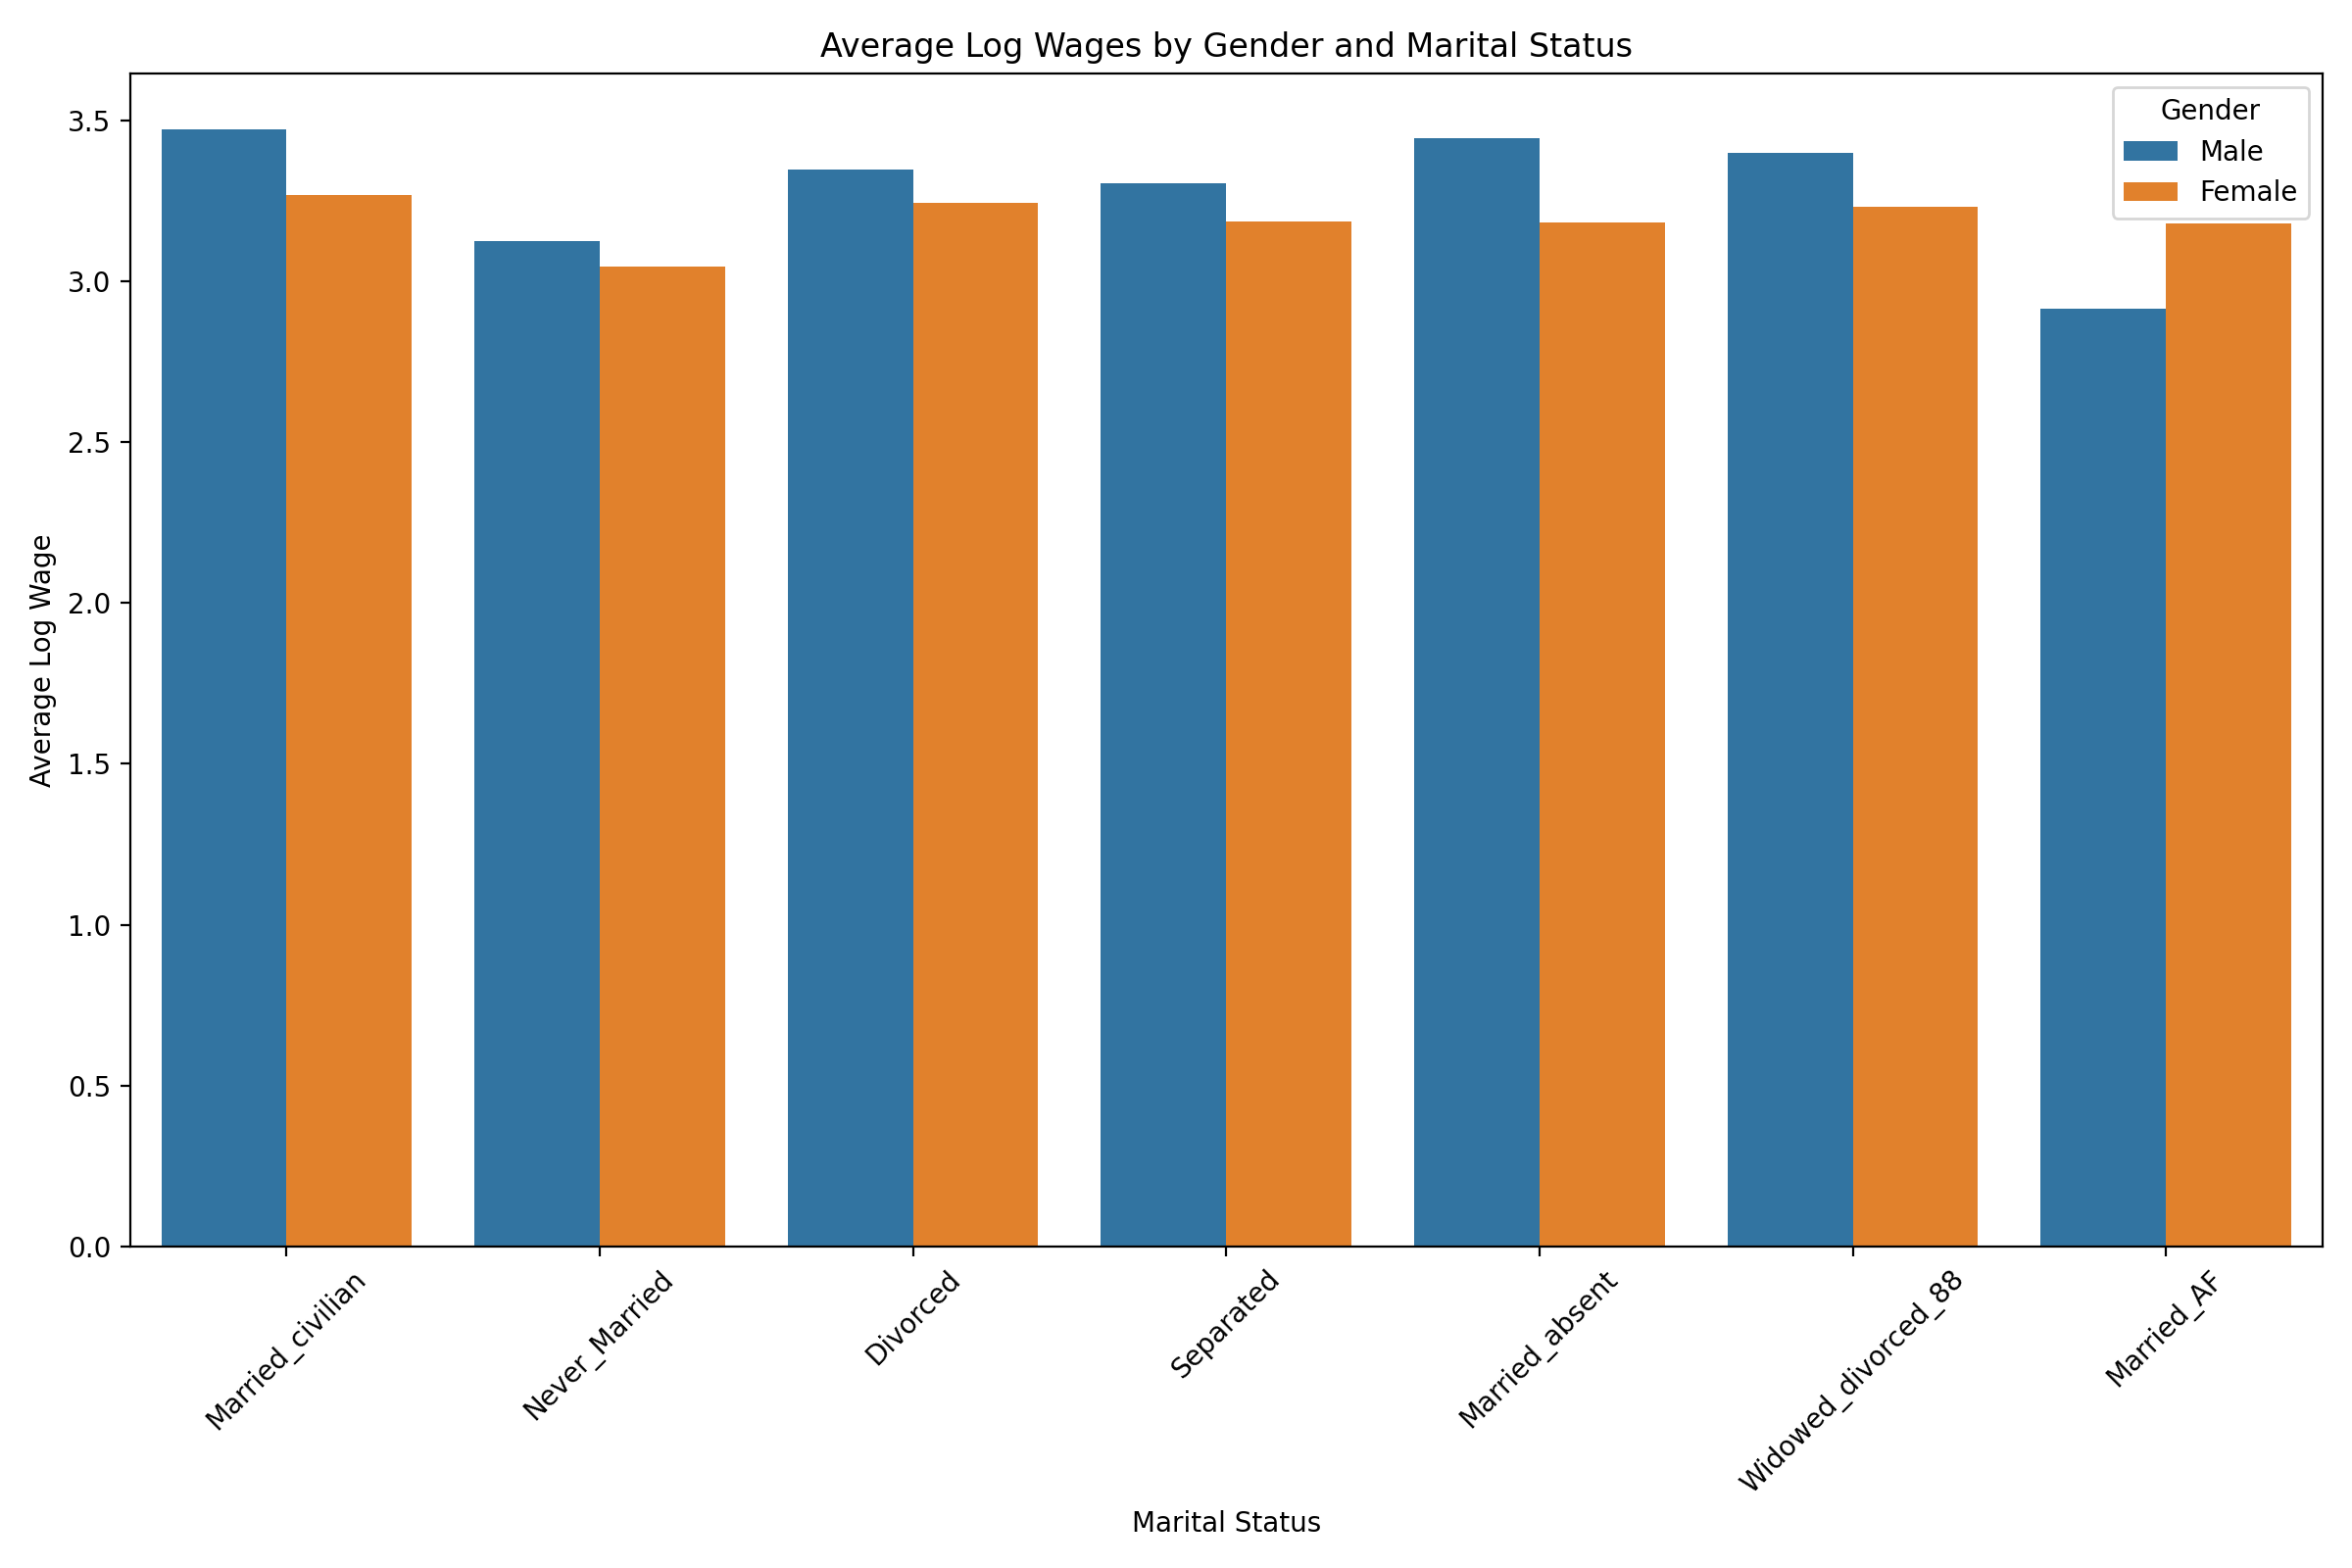

In [28]:
# Converting the numeric codes to more descriptive labels
marital_status_labels = {
    1: 'Married_civilian',
    2: 'Married_AF',
    3: 'Married_absent',
    4: 'Widowed_divorced_88',  # Assuming code 4 represents this group post-1988
    5: 'Divorced',
    6: 'Separated',
    7: 'Never_Married'
}
df_edu['marital_label'] = df_edu['marital'].map(marital_status_labels)

# Create a bar plot for average log wages by marital status and gender
plt.figure(figsize=(12, 8))
sns.barplot(x='marital_label', y='lnw', hue='female', data=df_edu, ci=None)

# Title and labels
plt.title('Average Log Wages by Gender and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Log Wage')
plt.legend(title='Gender', labels=['Male', 'Female'])

# Rotate x-labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
